# Вариант 6
## Марусова

<div><img src="./Марусова.png" width="450"/></div>

In [1]:
import numpy as np

def rounding(n):
    return round(round(n,3)+0.001,3) if (round(n,3)*1000)%2!=0 else round(n,3)

def sinys(t,amplisuda,L):
    return amplisuda*np.sin(np.pi*t/L)

def solve(k,c,m1,m2,m3,m4,m5,h1,h2,h3,h4,l1,l2,l3,l4,I1,L,A,v,delta_t=0.002,gamma = 0.5,betta = 0.25):
    #Создаем матрицу коэффициентов упругости
    v = v*1000/3600
    T = round((l1+l2+L)/v,2)
    T = [round(i,3) for i in np.arange(0,(T+0.401),delta_t)]
    N = len(T)
    t_matrix = list(map(rounding,[(l2-l2)/v,(l2-l4)/v, (l2+l3)/v,(l2+l1)/v]))
    n_it1t = int((L/v)/delta_t)
    sinus = np.array([sinys(r,A,L) for r in np.linspace(0,1,n_it1t)])
    K_diag = np.diag(k)
    K_diag = np.diag(k)
    D = np.array([[-1,h1,1,0,0,0],
    [-1,h2,0,1,0,0],
    [-1,h3,0,0,1,0],
    [-1,h4,0,0,0,1],
    [1,-l1,0,0,0,0],
    [1,-l3,0,0,0,0],
    [1,l4,0,0,0,0],
    [1,l2,0,0,0,0]])
    K = np.transpose(D)@K_diag@D
    #Создаем матрицу коэффициентов демпфирования
    C_diag = np.diag(c)
    C = np.array([[0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [1,-l1,0,0,0,0],
    [1,-l3,0,1,0,0],
    [1,l4,0,0,1,0],
    [1,l2,0,0,0,0]])
    C = np.transpose(C)@C_diag@C
    #Создаем диагональную матрицу масс и моментов
    M = np.diag([m1,I1,m2,m3,m4,m5])
    #Делаем матрицу внешних воздействий
    n = D.shape[0]-len(t_matrix)+1
    y_voz = np.zeros((D.shape[0]+1,N))
    y_voz[0,:] = T
    index_t = [np.where(y_voz[0,:] == i)[-1][-1] for i in t_matrix]
    for i in index_t:
        y_voz[n,i:] =  np.concatenate([sinus,np.zeros((N-n_it1t-i))])
        n+=1
    y_impact = y_voz[1:,:]
    #Создаем обратную матрицу
    M_reverse = np.linalg.inv(M+delta_t*gamma*C+delta_t**2*betta*K)
    #Создадим оператор для ввода вектора внешних сил
    K_diag_transpose = np.transpose(D)@K_diag
    #Зададим вектора перемещения скорости и ускорения в 0 момент
    X = np.zeros((K_diag_transpose.shape[0],1))
    X_t = np.zeros((K_diag_transpose.shape[0],1))
    X_tt = np.zeros((K_diag_transpose.shape[0],1))
    for i in range(N-1):
        #Формируем матрицы методом Ньюмарка
        #Ускорений
        F = K_diag_transpose@y_impact[:,i+1]-C@(X_t[:,-1]+delta_t*(1-gamma)*X_tt[:,-1])-K@(X[:,-1]+delta_t*X_t[:,-1]+1/2*delta_t**2*(1-2*betta)*X_tt[:,-1])
        X_tt = np.concatenate([X_tt,(np.dot(F,M_reverse)).reshape(-1,1)],axis =1)
        #Скоростей
        X_tn = X_t[:,i]+delta_t*(gamma*X_tt[:,-1]+(1-gamma)*X_tt[:,i])
        X_t = np.concatenate([X_t,X_tn.reshape(-1,1)],axis =1)
        #Перемещений
        X_n = X[:,i]+delta_t*X_t[:,i]+0.5*(delta_t**2)*(2*betta*X_tt[:,-1]+(1-2*betta)*X_tt[:,i])
        X = np.concatenate([X,X_n.reshape(-1,1)],axis =1)
    return X,X_t,X_tt

In [2]:
X,X_t,X_tt = solve([10**7,10**7,2*10**7,2*10**7,9*10**5,9*10**5,8*10**5,8*10**5],[0,0,0,0,8*10**3,8*10**3,8*10**3,8*10**3],2300,300,380,250,400,2.2,0.8,1.1,2.3,2.4,2.2,0.9,1,15000,1.1,0.35,30)

,0,1,2,3,4,5,6,7,8,9,...,531,532,533,534,535,536,537,538,539,540
0,0.0,5.695646e-06,3.313157e-05,0.000100,0.000219,0.000396,0.000630,0.000920,0.001266,0.001670,...,-0.004907,-0.004299,-0.003694,-0.003092,-0.002494,-0.001900,-0.001310,-0.000726,-0.000149,0.000420
1,0.0,-2.137124e-06,-1.256351e-05,-0.000039,-0.000086,-0.000159,-0.000261,-0.000394,-0.000561,-0.000765,...,-0.014258,-0.014763,-0.015228,-0.015653,-0.016039,-0.016384,-0.016689,-0.016955,-0.017181,-0.017366
2,0.0,3.353973e-07,3.258676e-06,0.000016,0.000054,0.000141,0.000310,0.000599,0.001045,0.001684,...,0.026760,0.028626,0.030431,0.032153,0.033767,0.035253,0.036593,0.037777,0.038802,0.039676
3,0.0,3.291706e-08,6.250740e-07,0.000004,0.000017,0.000051,0.000121,0.000248,0.000453,0.000757,...,0.005813,0.006918,0.007995,0.009037,0.010038,0.010990,0.011889,0.012732,0.013519,0.014251
4,0.0,4.764801e-07,4.732101e-06,0.000023,0.000077,0.000198,0.000418,0.000768,0.001263,0.001904,...,0.010703,0.011872,0.012982,0.014038,0.015044,0.016005,0.016926,0.017808,0.018650,0.019447
5,0.0,5.052871e-07,4.878600e-06,0.000024,0.000079,0.000204,0.000442,0.000836,0.001425,0.002236,...,0.028446,0.030200,0.031846,0.033390,0.034838,0.036197,0.037472,0.038668,0.039783,0.040814


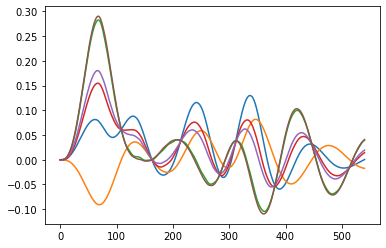

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

for i in range(len(X)):
    plt.plot(X[i])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,531,532,533,534,535,536,537,538,539,540
0,0.0,0.005696,0.021740,0.045467,0.073522,0.102833,0.131462,0.159049,0.186721,0.216523,...,0.305523,0.303423,0.301557,0.299853,0.298126,0.296144,0.293683,0.290556,0.286622,0.281770
1,0.0,-0.002137,-0.008289,-0.017786,-0.029777,-0.043486,-0.058426,-0.074522,-0.092085,-0.111672,...,-0.262445,-0.242516,-0.222554,-0.202598,-0.182656,-0.162720,-0.142777,-0.122815,-0.102829,-0.082819
2,0.0,0.000335,0.002588,0.010150,0.027635,0.059655,0.109657,0.179107,0.267229,0.371316,...,0.945178,0.920352,0.884770,0.837118,0.777653,0.708156,0.631672,0.552084,0.473586,0.400122
3,0.0,0.000033,0.000559,0.003037,0.009839,0.023611,0.046611,0.080218,0.124700,0.179298,...,0.558370,0.546403,0.530803,0.511483,0.488749,0.463247,0.435857,0.407576,0.379390,0.352158
4,0.0,0.000476,0.003779,0.014808,0.039291,0.080957,0.139491,0.210132,0.285097,0.356316,...,0.598860,0.569570,0.541124,0.514790,0.491202,0.470170,0.450722,0.431362,0.410466,0.386718
5,0.0,0.000505,0.003868,0.014999,0.040204,0.085049,0.152434,0.241498,0.347670,0.463850,...,0.904762,0.849638,0.796726,0.747004,0.700868,0.658029,0.617522,0.577848,0.537215,0.493852


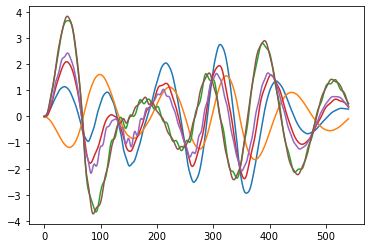

In [4]:
for i in range(len(X)):
    plt.plot(X_t[i])
pd.DataFrame(X_t)

,0,1,2,3,4,5,6,7,8,9,...,531,532,533,534,535,536,537,538,539,540
0,0.0,5.695646,10.348983,13.377915,14.676431,14.634758,13.994518,13.592104,14.080188,15.722051,...,-1.109560,-0.991101,-0.874100,-0.829895,-0.897538,-1.084513,-1.376393,-1.750078,-2.184824,-2.666944
1,0.0,-2.137124,-4.015013,-5.481699,-6.509543,-7.199068,-7.741580,-8.354057,-9.208530,-10.379191,...,9.948529,9.979763,9.982265,9.974306,9.967836,9.968096,9.975205,9.986639,9.999353,10.010715
2,0.0,0.335397,1.917087,5.644926,11.839703,20.181137,29.820774,39.628560,48.494178,55.592972,...,-9.985346,-14.841003,-20.740549,-26.911964,-32.553080,-36.943516,-39.540507,-40.047713,-38.450267,-35.013366
3,0.0,0.032917,0.493406,1.984706,4.817430,8.953706,14.046903,19.559968,24.922279,29.675642,...,-5.111345,-6.854931,-8.745068,-10.575720,-12.157882,-13.344309,-14.045370,-14.235439,-13.950875,-13.281500
4,0.0,0.476480,2.826181,8.202191,16.281457,25.384488,33.149380,37.491640,37.473836,33.745014,...,-14.667679,-14.622999,-13.822682,-12.510960,-11.077685,-9.954260,-9.492936,-9.867695,-11.028043,-12.719670
5,0.0,0.505287,2.857452,8.273143,16.932215,27.912540,39.473037,49.591019,56.580847,59.599097,...,-27.960941,-27.163120,-25.749161,-23.972599,-22.163088,-20.676277,-19.830423,-19.843974,-20.789215,-22.573540


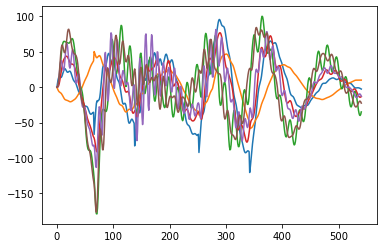

In [5]:
for i in range(len(X)):
    plt.plot(X_tt[i])
pd.DataFrame(X_tt)